The Jupyter Notebook is structured into various sections, each addressing distinct techniques and concepts related to natural language processing and text analysis. The initial section delves into string manipulation with `re.split()` and `re.findall()`. Following this, the notebook introduces the fundamental concept of tokenization, demonstrating word tokenization using the NLTK library and showcasing the application of regular expressions with `re.search()` and `re.match()`. The subsequent section advances into more complex tokenization tasks, including handling non-ascii characters and visualizing word lengths using NLTK. Moving on, the notebook explores simple topic identification methodologies, such as the bag-of-words model and the creation of a corpus with gensim. Additionally, it discusses Named Entity Recognition (NER) using NLTK and compares it with spaCy. The final sections shift focus towards practical applications, specifically a Fake News Classifier. Techniques covered include text vectorization using CountVectorizer and TfidfVectorizer, inspecting vectors, and training/testing the classifier. The notebook concludes by providing insights into model improvement and methods for inspecting the model's performance.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import  numpy as np

In [3]:
import re
from nltk.tokenize import word_tokenize,sent_tokenize,regexp_tokenize,TweetTokenizer

In [3]:
#3
from collections import Counter,defaultdict
from collections import defaultdict
import itertools
from nltk.stem import WordNetLemmatizer
import nltk
#nltk.download('wordnet')
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel


In [7]:
import spacy

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [12]:
#pip install polyglot

#### re.split() and re.findall()

In [5]:
my_string="Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"


In [6]:
# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[\.?!]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))

# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))

["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', '']
['Let', 'RegEx', 'Won', 'Can', 'Or']
["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']
['4', '19']


## Introduction to tokenization
#### Word tokenization with NLTk
sent_tokenize, regexp_tokenize, TweetTokenizer

In [18]:
file_path=r'G:\\datacamp\\NLP\New folder\\grail.txt'
with open(file_path, 'r') as file:
        grail = file.read()

In [30]:
#grail
SCENE_1="[wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a temperate zone.\nARTHUR: The swallow may fly south with the sun or the house martin or the plover may seek warmer climes in winter, yet these are not strangers to our land?\nSOLDIER #1: Are you suggesting coconuts migrate?\nARTHUR: Not at all.  They could be carried.\nSOLDIER #1: What?  A swallow carrying a coconut?\nARTHUR: It could grip it by the husk!\nSOLDIER #1: It's not a question of where he grips it!  It's a simple question of weight ratios!  A five ounce bird could not carry a one pound coconut.\nARTHUR: Well, it doesn't matter.  Will you go and tell your master that Arthur from the Court of Camelot is here.\nSOLDIER #1: Listen.  In order to maintain air-speed velocity, a swallow needs to beat its wings forty-three times every second, right?\nARTHUR: Please!\nSOLDIER #1: Am I right?\nARTHUR: I'm not interested!\nSOLDIER #2: It could be carried by an African swallow!\nSOLDIER #1: Oh, yeah, an African swallow maybe, but not a European swallow.  That's my point.\nSOLDIER #2: Oh, yeah, I agree with that.\nARTHUR: Will you ask your master if he wants to join my court at Camelot?!\nSOLDIER #1: But then of course a-- African swallows are non-migratory.\nSOLDIER #2: Oh, yeah...\nSOLDIER #1: So they couldn't bring a coconut back anyway...  [clop clop clop] \nSOLDIER #2: Wait a minute!  Supposing two swallows carried it together?\nSOLDIER #1: No, they'd have to have it on a line.\nSOLDIER #2: Well, simple!  They'd just use a strand of creeper!\nSOLDIER #1: What, held under the dorsal guiding feathers?\nSOLDIER #2: Well, why not?\n"

In [36]:
# Split scene_one into sentences: sentences
sentences = sent_tokenize(SCENE_1)

print("\n********Sentences*******",sentences)
# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])
print("\n*******word***********",tokenized_sent)
# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(SCENE_1))
# Print the unique tokens result
print("\n**************unique set**************",unique_tokens)


********Sentences******* ['[wind] [clop clop clop] \nKING ARTHUR: Whoa there!', '[clop clop clop] \nSOLDIER #1: Halt!', 'Who goes there?', 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.', 'King of the Britons, defeator of the Saxons, sovereign of all England!', 'SOLDIER #1: Pull the other one!', 'ARTHUR: I am, ...  and this is my trusty servant Patsy.', 'We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.', 'I must speak with your lord and master.', 'SOLDIER #1: What?', 'Ridden on a horse?', 'ARTHUR: Yes!', "SOLDIER #1: You're using coconuts!", 'ARTHUR: What?', "SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.", 'ARTHUR: So?', "We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?", 'ARTHUR: We found them.', 'SOLDIER #1: Found them?', 'In Mercea?', "The coconut's tropical!

#### re.search()/ re.match()

In [39]:
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", SCENE_1)

# Print the start and end indexes of match
print(match.start(), match.end())

571 579


In [45]:
# Write a regular expression to search for anything in square brackets: pattern1
pattern1 = r"\[.*]"

# Use re.search to find the first text in square brackets
print(re.search(pattern1, SCENE_1))

<re.Match object; span=(0, 23), match='[wind] [clop clop clop]'>


In [46]:
# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"[\w\s]+:"
print(re.match(pattern2, sentences[3]))

<re.Match object; span=(0, 7), match='ARTHUR:'>


## Advanced tokenization with NLTK and regex

In [67]:
my_string = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"
regexp_tokenize(my_string, r"(\w+|\d|\?|!|#)")
#all word or # all digit or all ?|!


['SOLDIER',
 '#',
 '1',
 'Found',
 'them',
 '?',
 'In',
 'Mercea',
 '?',
 'The',
 'coconut',
 's',
 'tropical',
 '!']

In [68]:
tweets = [
    ['#nlp', '#python'],
    ['This is the best #nlp exercise ive found online! #python', '#NLP is super fun! <3 #learning', 'Thanks @datacamp :) #nlp #python']
]

# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"
pattern2 = r"([@|#]\w+)" #********************

# Iterate over each tweet and apply the tokenizer
for tweet in tweets[1]:  # Skip the first element since it's a list of hashtags
    hashtags = regexp_tokenize(tweet, pattern2)
    print(hashtags)

['#nlp', '#python']
['#NLP', '#learning']
['@datacamp', '#nlp', '#python']


In [66]:
###############tweettokenizer
tknzr = TweetTokenizer()

# Iterate over each tweet and tokenize
all_tokens = [tknzr.tokenize(tweet) for tweet in tweets[1]]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


#### Non-ascii tokenization
In this exercise, you'll practice advanced tokenization by tokenizing some non-ascii based text. You'll be using German with emoji!

In [71]:
german_text='Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'
# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

# Tokenize and print only capital words
capital_words = r"[A-ZÜ]\w+"
print(regexp_tokenize(german_text, capital_words))

# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']
['Wann', 'Pizza', 'Und', 'Über']
['🍕', '🚕']


#### Charting word length with NLTK
Charting practice
Try using your new skills to find and chart the number of words per line

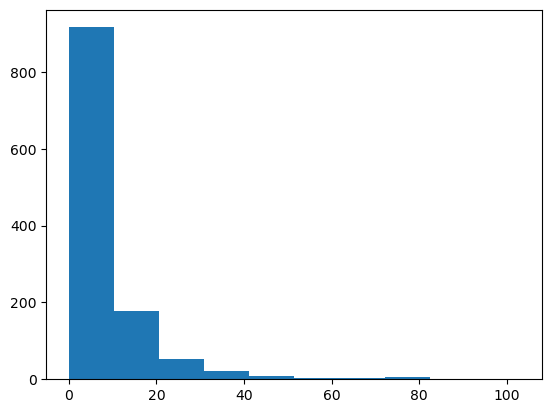

In [75]:
# Split the script inholy_grailto lines: lines
lines = grail.split('\n')

# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:" ##se below
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s,"\w+") for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()

KING ARTHUR: Whoa there!  [clop clop clop] 
[' Whoa there!  [clop clop clop] ', ' Halt!  Who goes there?', ' It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!', ' Pull the other one!']
tokenized_lines ['Whoa', 'there', 'clop', 'clop', 'clop']


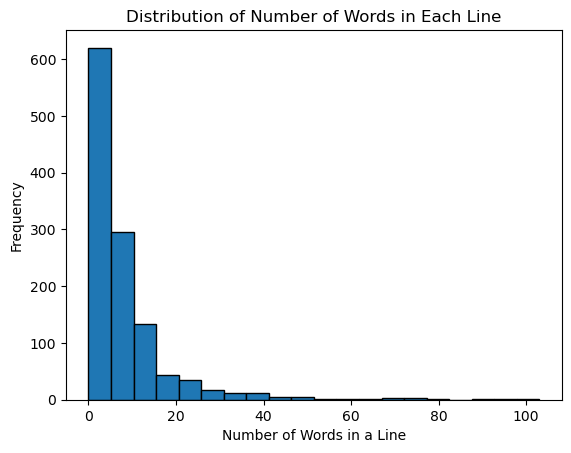

In [106]:
import re
from nltk.tokenize import regexp_tokenize
import matplotlib.pyplot as plt

# Assuming you have loaded 'grail' with your script

# Split the script into lines
lines = grail.split('\n')
print(lines[1])
# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines] ## removes speaker information
print(lines[1:5])

# Tokenize each line excluding punctuation: tokenized_lines
tokenized_lines = [regexp_tokenize(s, pattern=r"\b\w+\b") for s in lines]
print('tokenized_lines',tokenized_lines[1])

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

#print(line_num_words[0])

# Plot a histogram of the line lengths
plt.hist(line_num_words, bins=20, edgecolor='black')
plt.xlabel('Number of Words in a Line')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Words in Each Line')
plt.show()


"[A-Z]{2,}": Matches two or more uppercase letters (assumed to be the speaker's name).<br>
(\s)?: Optional whitespace character (space) after the speaker's name.<br>
(#\d)?: Optional speaker identifier, which starts with # followed by one or more digits.<br>
([A-Z]{2,})?: Optional additional uppercase letters (used for some speakers with longer names).<br>
:: Matches the colon that separates the speaker from the dialogue.<br>
The re.sub function replaces any matching pattern in each line with an empty string (''), effectively removing the speaker information.<br>

| Tokenizer                         | Usage                                                      | Example                                           |
|-----------------------------------|------------------------------------------------------------|---------------------------------------------------|
| Word Tokenizer (`word_tokenize`)  | Tokenizes text into words.                                  | `from nltk.tokenize import word_tokenize`<br>`text = "This is a sample sentence."`<br>`tokens = word_tokenize(text)`                  |
| WordPunct Tokenizer (`wordpunct_tokenize`) | Tokenizes text using punctuation as separators. | `from nltk.tokenize import wordpunct_tokenize`<br>`text = "This is a sample sentence."`<br>`tokens = wordpunct_tokenize(text)`        |
| Whitespace Tokenizer (`WhitespaceTokenizer`) | Tokenizes text based on whitespace. | `from nltk.tokenize import WhitespaceTokenizer`<br>`tokenizer = WhitespaceTokenizer()`<br>`text = "This is a sample sentence."`<br>`tokens = tokenizer.tokenize(text)` |
| Regexp Tokenizer (`regexp_tokenize`) | Tokenizes text based on a regular expression pattern. | `from nltk.tokenize import regexp_tokenize`<br>`text = "This is a sample sentence."`<br>`pattern = r"\b\w+\b"`<br>`tokens = regexp_tokenize(text, pattern)` |
| Sent Tokenizer (`sent_tokenize`) | Tokenizes text into sentences. | `from nltk.tokenize import sent_tokenize`<br>`text = "This is a sample sentence. Another sentence follows."`<br>`sentences = sent_tokenize(text)` |
| Treebank Tokenizer (`TreebankWordTokenizer`) | Tokenizes text using the Penn Treebank conventions. | `from nltk.tokenize import TreebankWordTokenizer`<br>`tokenizer = TreebankWordTokenizer()`<br>`text = "This is a sample sentence."`<br>`tokens = tokenizer.tokenize(text)` |


## Simple topic identification
#### Bag-of-words 

In [11]:
article_debug_path='G:\\datacamp\\NLP\\New folder\\Wikipedia articles\\Wikipedia articles\\wiki_text_debugging.txt'
with open(article_debug_path, 'r') as file:
        article_debug = file.read()

In [18]:
article_debug

'\'\'\'Debugging\'\'\' is the process of finding and resolving of defects that prevent correct operation of computer software or a system.  \n\nNumerous books have been written about debugging (see below: #Further reading|Further reading), as it involves numerous aspects, including interactive debugging, control flow, integration testing, Logfile|log files, monitoring (Application monitoring|application, System Monitoring|system), memory dumps, Profiling (computer programming)|profiling, Statistical Process Control, and special design tactics to improve detection while simplifying changes.\n\nOrigin\nA computer log entry from the Mark&nbsp;II, with a moth taped to the page\n\nThe terms "bug" and "debugging" are popularly attributed to Admiral Grace Hopper in the 1940s.[http://foldoc.org/Grace+Hopper Grace Hopper]  from FOLDOC While she was working on a Harvard Mark II|Mark II Computer at Harvard University, her associates discovered a moth stuck in a relay and thereby impeding operatio

In [12]:
# Tokenize the article: tokens
tokens = word_tokenize(article_debug)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]
# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))

[(',', 151), ('the', 150), ('.', 89), ('of', 81), ("''", 69), ('to', 63), ('a', 60), ('``', 47), ('in', 44), ('and', 41)]


In [17]:
from nltk.corpus import stopwords

In [19]:
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]
print('alpha_only',alpha_only[:10])
# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in stopwords.words('english')]
#print('no_stops',no_stops)

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
print('lemmatized',lemmatized[:10])

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))

alpha_only ['is', 'the', 'process', 'of', 'finding', 'and', 'resolving', 'of', 'defects', 'that']
lemmatized ['process', 'finding', 'resolving', 'defect', 'prevent', 'correct', 'operation', 'computer', 'software', 'system']
[('debugging', 39), ('system', 25), ('bug', 17), ('software', 16), ('problem', 15), ('tool', 15), ('computer', 14), ('process', 13), ('term', 13), ('debugger', 13)]


In [20]:
tokens = word_tokenize(article_debug)

# Filter out non-alphabetic tokens using regular expressions
alpha_only = [t for t in tokens if re.match('^[a-zA-Z]+$', t)]

# Convert the tokens into lowercase
lower_tokens = [t.lower() for t in alpha_only]

# Remove stop words
no_stops = [t for t in lower_tokens if t not in stopwords.words('english')]

# Lemmatize the remaining tokens
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))

[('debugging', 39), ('system', 25), ('bug', 17), ('software', 16), ('problem', 15), ('tool', 15), ('computer', 14), ('process', 13), ('term', 13), ('debugger', 13)]


In [ ]:
### functions and play

In [24]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

# Assuming you have already read the file into article_debug

# Tokenize the article using NLTK's word_tokenize
tokens = word_tokenize(article_debug)

# Remove punctuation from tokens
tokens = [t for t in tokens if t not in string.punctuation]

# Filter out non-alphabetic tokens using isalpha()
alpha_only = [t for t in tokens if t.isalpha()]

# Convert the tokens into lowercase
lower_tokens = [t.lower() for t in alpha_only]

# Remove stop words
no_stops = [t for t in lower_tokens if t not in stopwords.words('english')]

# Lemmatize the remaining tokens
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))

[('debugging', 39), ('system', 25), ('bug', 17), ('software', 16), ('problem', 15), ('tool', 15), ('computer', 14), ('process', 13), ('term', 13), ('debugger', 13)]


In [25]:
def process_file(file_path, articles_word=None):
    """
    Process the text in the given file path and generate a bag-of-words (BoW) representation.
    
    If articles_word is provided, append the words to the existing list.

    Parameters:
    - file_path (str): The path to the text file.
    - articles_word (list): List to store the bag-of-words representations.

    Returns:
    - articles_word (list): Updated list of bag-of-words.
    """
    # Read the content of the file
    with open(file_path, 'r') as file:
        article_text = file.read()

    # Tokenize the article using NLTK's word_tokenize
    tokens = word_tokenize(article_text)

    # Convert the tokens into lowercase
    lower_tokens = [t.lower() for t in tokens]

    # Create a Counter with the lowercase tokens (bow_simple)
    bow_simple = Counter(lower_tokens)

    # Retain alphabetic words
    alpha_only = [t for t in lower_tokens if t.isalpha()]

    # Remove stop words
    no_stops = [t for t in alpha_only if t not in stopwords.words('english')]

    # Instantiate the WordNetLemmatizer
    wordnet_lemmatizer = WordNetLemmatizer()

    # Lemmatize all tokens into a new list (lemmatized)
    lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

    # Create the bag-of-words (bow)
    bow = Counter(lemmatized)

    # Update articles_word
    if articles_word is None:
        articles_word = [bow]
    else:
        articles_word.append(bow)

    return articles_word

In [26]:
articles_word = process_file('G:\\datacamp\\NLP\\New folder\\Wikipedia articles\\Wikipedia articles\\wiki_text_debugging.txt')

In [30]:
articles_word = process_file('G:\\datacamp\\NLP\\New folder\\Wikipedia articles\\Wikipedia articles\\wiki_text_program.txt', articles_word)

In [33]:
articles_word=process_file('G:\\datacamp\\NLP\\New folder\\Wikipedia articles\\Wikipedia articles\\wiki_text_malware.txt', articles_word)

In [39]:
def preprocess_text(text):
    """
    Preprocess the input text by lowercasing, tokenizing, and removing stop words and punctuation.

    Parameters:
    - text (str): The input text.

    Returns:
    - preprocessed_text (list): List of preprocessed words.
    """
    # Lowercasing
    lowercased_text = text.lower()

    # Tokenization
    tokens = word_tokenize(lowercased_text)

    # Remove punctuation
    tokens = [t for t in tokens if t not in string.punctuation]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in stop_words]

    # Lemmatization
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]

    return lemmatized_tokens

# Example usage:
article_debug_path = 'G:\\datacamp\\NLP\\New folder\\Wikipedia articles\\Wikipedia articles\\wiki_text_debugging.txt'

with open(article_debug_path, 'r') as file:
    article_debug = file.read()
preprocessed_text_debug = preprocess_text(article_debug)
#print("Preprocessed Text:", preprocessed_text)

In [40]:
articles_words=[]
articles_words.append(preprocessed_text_debug)

In [45]:
article_debug_path = 'G:\\datacamp\\NLP\\New folder\\Wikipedia articles\\Wikipedia articles\\wiki_text_malware.txt'

with open(article_debug_path, 'r') as file:
    article_debug = file.read()
preprocessed_text_malware = preprocess_text(article_debug)
articles_words.append(preprocessed_text_malware)

In [ ]:
article_debug_path = 'G:\\datacamp\\NLP\\New folder\\Wikipedia articles\\Wikipedia articles\\wiki_text_malware.txt'

with open(article_debug_path, 'r') as file:
    article_debug = file.read()
preprocessed_text_malware = preprocess_text(article_debug)
articles_words.append(preprocessed_text_malware)

In [47]:
article_debug_path = 'G:\\datacamp\\NLP\\New folder\\Wikipedia articles\\Wikipedia articles\\wiki_text_language.txt'

with open(article_debug_path, 'r') as file:
    article_debug = file.read()
preprocessed_text_language = preprocess_text(article_debug)
articles_words.append(preprocessed_text_language)

In [48]:
article_debug_path = 'G:\\datacamp\\NLP\\New folder\\Wikipedia articles\\Wikipedia articles\\wiki_text_program.txt'

with open(article_debug_path, 'r') as file:
    article_debug = file.read()
preprocessed_text_program = preprocess_text(article_debug)
articles_words.append(preprocessed_text_program)

In [50]:
article_debug_path = 'G:\\datacamp\\NLP\\New folder\\Wikipedia articles\\Wikipedia articles\\wiki_text_software.txt'

with open(article_debug_path, 'r') as file:
    article_debug = file.read()
preprocessed_text_software = preprocess_text(article_debug)
articles_words.append(preprocessed_text_software)

In [52]:
article_debug_path = 'G:\\datacamp\\NLP\\New folder\\Wikipedia articles\\Wikipedia articles\\wiki_text_debugger.txt'

with open(article_debug_path, 'r') as file:
    article_debug = file.read()
preprocessed_text_debugger = preprocess_text(article_debug)
articles_words.append(preprocessed_text_debugger)

#### Creating and querying a corpus with gensim
It's time to apply the methods to create your first gensim dictionary and corpus!

In [61]:

# Import Dictionary
from gensim.corpora.dictionary import Dictionary

# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(articles_words)

# Select the id for "computer": computer_id
computer_id = dictionary.token2id.get("computer")

# Use computer_id with the dictionary to print the word
print(dictionary.get(computer_id))

# Create a MmCorpus: corpus
corpus = [dictionary.doc2bow(article) for article in articles_words]

# Print the first 10 word ids with their frequency counts from the fifth document
print(corpus[4][:10])
print(len(articles_words))

computer
[(0, 53), (3, 5), (5, 4), (51, 35), (52, 1), (53, 1), (59, 1), (60, 3), (73, 3), (76, 1)]
6


The bag-of-words representation for the fifth document shows the word IDs and their frequencies. For example, the word with ID 0 appears 53 times in the fifth document.

In [59]:
word_id_1 = dictionary.id2token[1]
print("Word corresponding to ID 1:", word_id_1)

Word corresponding to ID 1: 'debugging


#### Gensim bag-of-words
Now, you'll use your new gensim corpus and dictionary to see the most common terms per document and across all documents. You can use your dictionary to look up the terms. Take a guess at what the topics are and feel free to explore more documents in the IPython Shell!<p>

You have access to the dictionary and corpus objects you created in the previous exercise, as well as the Python defaultdict and itertools to help with the creation of intermediate data structures for analysis.

<code>defaultdict</code> allows us to initialize a dictionary that will assign a default value to non-existent keys. By supplying the argument <code>int</code>, we are able to ensure that any non-existent keys are automatically assigned a default value of 0. This makes it ideal for storing the counts of words in this exercise.

<code>itertools.chain.from_iterable()</code> allows us to iterate through a set of sequences as if they were one continuous sequence. Using this function, we can easily iterate through our corpus object (which is a list of lists).

The fifth document from corpus is stored in the variable doc, which has been sorted in descending order.

In [65]:
from collections import defaultdict
import itertools

In [68]:
# Save the fifth document: doc
doc = corpus[4]

# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)
    
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count
    
# Create a sorted list from the defaultdict: sorted_word_count
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

# Print the top 5 words across all documents alongside the count
for key,value in sorted_word_count[:5]:
    print(dictionary.get(key),value)

software 161
computer 55
'' 53
application 37
`` 35
'' 322
software 273
computer 262
`` 170
program 159


#### Tf-idf with Wikipedia
Now it's your turn to determine new significant terms for your corpus by applying gensim's tf-idf. You will again have access to the same corpus and dictionary objects you created in the previous exercises - dictionary, corpus, and doc. Will tf-idf make for more interesting results on the document level?

In [70]:
# Create a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

# Calculate the tfidf weights of doc: tfidf_weights
tfidf_weights = tfidf[doc]

# Print the first five weights
print(tfidf_weights[:5])

[(5, 0.010321980085760985), (52, 0.009810484728263303), (53, 0.01554925040819492), (59, 0.01554925040819492), (60, 0.029431454184789912)]


In [71]:
# Create a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

# Calculate the tfidf weights of doc: tfidf_weights
tfidf_weights = tfidf[doc]

# Print the first five weights
print(tfidf_weights[:5])

# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id), weight)

[(5, 0.010321980085760985), (52, 0.009810484728263303), (53, 0.01554925040819492), (59, 0.01554925040819492), (60, 0.029431454184789912)]
patent 0.35503629191041514
application 0.21233433015746975
” 0.15696775565221285
apis 0.15215841081874934
license 0.15215841081874934


## Named-entity recognition

#### NER with NLTK
You're now going to have some fun with named-entity recognition!

In [1]:
article_debug_path='G:\\datacamp\\NLP\\New folder\\Wikipedia articles\\Wikipedia articles\\wiki_text_debugging.txt'
with open(article_debug_path, encoding="utf8") as file:
        article_debug = file.read()

In [4]:
uber_apple_p=r'G:\\datacamp\\NLP\\New folder\\News articles\\News articles\\uber_apple.txt'
with open(uber_apple_p, encoding="utf8") as file:
      uber_apple=file.read()

In [7]:
uber_apple[1:100]

'The taxi-hailing company Uber brings into very sharp focus the question of whether corporations can'

In [30]:

# Tokenize the article into sentences: sentences
sentences = sent_tokenize(uber_apple)
#print(sentences[0:5])
# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]
#print(token_sentences[0:5])
# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 
#print(pos_sentences[0:5])
# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences,binary=True) #This line performs Named Entity Recognition (NER) chunking on the part-of-speech tagged sentences using NLTK's ne_chunk_sents function. It identifies and groups together entities such as persons, organizations, and locations. The binary=True argument indicates that the chunker should only recognize named entities without further classifying them.
print(chunked_sentences)
# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

<generator object ParserI.parse_sents.<locals>.<genexpr> at 0x0000024A43E0FA40>
(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


#### Charting practice
In this exercise, you'll use some extracted named entities and their groupings from a series of newspaper articles to chart the diversity of named entity types in the articles.

In [52]:
#binary=False




articles_p=r'G:\\datacamp\\NLP\\New folder\\News articles\\News articles\\articles.txt'
with open(articles_p, encoding="utf8") as file:
      articles=file.read()



#Tokenize the article into sentences: sentences
sentences = sent_tokenize(articles)
#print(sentences[0:5])
# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]
#print(token_sentences[0:5])
# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 
#print(pos_sentences[0:5])
# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences,binary=False) #This line performs Named Entity Recognition (NER) chunking on the part-of-speech tagged sentences using NLTK's ne_chunk_sents function. It identifies and groups together entities such as persons, organizations, and locations. The binary=True argument indicates that the chunker should only recognize named entities without further classifying them.
print(chunked_sentences)
# Test for stems of the tree with 'NE' tags
#for sent in chunked_sentences:
 #   for chunk in sent:
  #      if hasattr(chunk, "label") and chunk.label() == "NE":
   #         print(chunk)

<generator object ParserI.parse_sents.<locals>.<genexpr> at 0x0000024A3FA98640>


In [53]:
# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
print(ner_categories)            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())
print(labels)

defaultdict(<class 'int'>, {'ORGANIZATION': 33, 'GPE': 115, 'PERSON': 70, 'LOCATION': 1, 'FACILITY': 1})
['ORGANIZATION', 'GPE', 'PERSON', 'LOCATION', 'FACILITY']


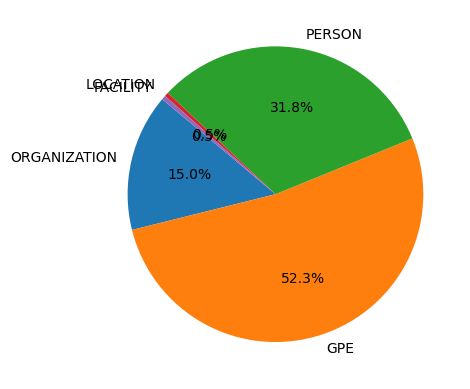

In [54]:
# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

#### Comparing NLTK with spaCy NER
Using the same text you used in the first exercise of this chapter, you'll now see the results using spaCy's NER annotator. How will they compare?

The article has been pre-loaded as article. To minimize execution times, you'll be asked to specify the keyword argument disable=['tagger', 'parser', 'matcher'] when loading the spaCy model, because you only care about the entity in this exercise.

In [68]:


# Instantiate the English model: nlp
#nlp = spacy.load('en_core_web_sm',disable=['tagger', 'parser', 'matcher'])
nlp = spacy.load('en_core_web_sm')
# Create a new document: doc
doc = nlp(uber_apple)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

ORG Apple
PERSON Uber
PERSON Travis Kalanick
ORG Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
ORG Uber
LOC Silicon Valley’s
NORP democratic
ORG Yahoo
PERSON Marissa Mayer
MONEY 186


## Fake News Classifier
#### CountVectorizer for text classification

In [4]:
df=pd.read_csv('fake_or_real_news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [6]:


# Create a series to store the labels: y
y = df.label

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df["text"],y,test_size=.33,random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train.values)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test.values)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names_out()[:10])

['00' '000' '0000' '00000031' '000035' '00006' '0001' '0001pt' '000ft'
 '000km']


#### TfidfVectorizer for text classification
Similar to the sparse CountVectorizer created in the previous exercise, you'll work on creating tf-idf vectors for your documents. You'll set up a TfidfVectorizer and investigate some of its features.

In [7]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english",max_df=.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
# Print the first 10 features
print(tfidf_vectorizer.get_feature_names_out()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:10])


['00' '000' '0000' '00000031' '000035' '00006' '0001' '0001pt' '000ft'
 '000km']
[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.0121467 0.        ... 0.        0.        0.       ]
 [0.        0.0165804 0.        ... 0.        0.        0.       ]]


#### Inspecting the vectors
To get a better idea of how the vectors work, you'll investigate them by converting them into pandas DataFrames.

In [8]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names_out())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names_out())

# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))


   00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...  \
0   0    0     0         0       0      0     0       0      0      0  ...   
1   0    0     0         0       0      0     0       0      0      0  ...   
2   0    0     0         0       0      0     0       0      0      0  ...   
3   0    0     0         0       0      0     0       0      0      0  ...   
4   0    0     0         0       0      0     0       0      0      0  ...   

   حلب  عربي  عن  لم  ما  محاولات  من  هذا  والمرضى  ยงade  
0    0     0   0   0   0        0   0    0        0      0  
1    0     0   0   0   0        0   0    0        0      0  
2    0     0   0   0   0        0   0    0        0      0  
3    0     0   0   0   0        0   0    0        0      0  
4    0     0   0   0   0        0   0    0        0      0  

[5 rows x 56922 columns]
    00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...  \
0  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

#### Training and testing the "fake news" model with countervectorizer

In [10]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train,y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print(score)
# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)

0.893352462936394
[[ 865  143]
 [  80 1003]]


#### Training and testing the "fake news" model with TfidfVectorizer
Now that you have evaluated the model using the CountVectorizer, you'll do the same using the TfidfVectorizer with a Naive Bayes model.

In [11]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)

0.8565279770444764
[[ 739  269]
 [  31 1052]]


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Create a GradientBoostingClassifier
clf = GradientBoostingClassifier()

# Fit the classifier to the training data
clf.fit(count_train, y_train)

# Get the predictions for the test data
y_pred = clf.predict(count_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        FAKE       0.85      0.93      0.89      1008
        REAL       0.92      0.85      0.88      1083

    accuracy                           0.89      2091
   macro avg       0.89      0.89      0.89      2091
weighted avg       0.89      0.89      0.89      2091



In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Create a GradientBoostingClassifier
clf = GradientBoostingClassifier()

# Fit the classifier to the training data
clf.fit(tfidf_train, y_train)

# Get the predictions for the test data
y_pred = clf.predict(tfidf_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        FAKE       0.86      0.92      0.89      1008
        REAL       0.92      0.87      0.89      1083

    accuracy                           0.89      2091
   macro avg       0.89      0.89      0.89      2091
weighted avg       0.89      0.89      0.89      2091



#### Improving your model
Your job in this exercise is to test a few different alpha levels using the Tfidf vectors to determine if there is a better performing combination.

In [16]:
# Create the list of alphas: alphas
alphas = np.arange(0,1,.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train,y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()


Alpha:  0.0
Score:  0.8813964610234337

Alpha:  0.1
Score:  0.8976566236250598

Alpha:  0.2
Score:  0.8938307030129125

Alpha:  0.30000000000000004
Score:  0.8900047824007652

Alpha:  0.4
Score:  0.8857006217120995

Alpha:  0.5


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Score:  0.8842659014825442

Alpha:  0.6000000000000001
Score:  0.874701099952176

Alpha:  0.7000000000000001
Score:  0.8703969392635102

Alpha:  0.8
Score:  0.8660927785748446

Alpha:  0.9
Score:  0.8589191774270684



#### Inspecting your model
Now that you have built a "fake news" classifier, you'll investigate what it has learned. You can map the important vector weights back to actual words using some simple inspection techniques.

In [27]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.feature_log_prob_[0], feature_names))
#list(zip(model.feature_log_prob_[0], cv.get_feature_names()))
# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[50:150])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

FAKE [(-11.280753302177917, '128th'), (-11.280753302177917, '13½'), (-11.280753302177917, '143m'), (-11.280753302177917, '147'), (-11.280753302177917, '148'), (-11.280753302177917, '14m'), (-11.280753302177917, '1500s'), (-11.280753302177917, '150th'), (-11.280753302177917, '15e'), (-11.280753302177917, '161'), (-11.280753302177917, '1621'), (-11.280753302177917, '1650'), (-11.280753302177917, '1689'), (-11.280753302177917, '1777'), (-11.280753302177917, '179'), (-11.280753302177917, '1797'), (-11.280753302177917, '1798'), (-11.280753302177917, '17s'), (-11.280753302177917, '1801'), (-11.280753302177917, '1804'), (-11.280753302177917, '1817'), (-11.280753302177917, '1820s'), (-11.280753302177917, '1824'), (-11.280753302177917, '1829'), (-11.280753302177917, '1831'), (-11.280753302177917, '1842'), (-11.280753302177917, '1845'), (-11.280753302177917, '1849'), (-11.280753302177917, '1853'), (-11.280753302177917, '1856'), (-11.280753302177917, '1857'), (-11.280753302177917, '1860s'), (-11.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Create a GradientBoostingClassifier
clf = GradientBoostingClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],             # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],          # Step size shrinkage
    'max_depth': [3, 4, 5],                     # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 1.0]                     # Fraction of samples used for fitting the individual base learners
}

# Create GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(tfidf_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(tfidf_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))